In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [1]:
from server.optimisation.models import *
from server.optimisation.gen_data import *

def getTicksForDay(id):
    day = Day.model_validate({"day": id, "deferables": getDefDemands(id)})
    ticks = []
    for tick in range(TICKS_PER_DAY):
        sun = getSunlight(tick)
        demand = getInstDemand(id, tick)
        sell, buy = getPrice(id, tick)

        ticks.append(
            Tick.model_validate(
                {
                    "tick": tick,
                    "sun": sun,
                    "demand": demand,
                    "sell_price": sell,
                    "buy_price": buy,
                    "day": id,
                }
            )
        )
    return day, ticks

In [50]:
buy_data = []
sell_data = []
for i in range(100):
    _, tmp_ticks = getTicksForDay(i)
    for tmp in tmp_ticks: buy_data.append(tmp.buy_price)
    for tmp in tmp_ticks: sell_data.append(tmp.sell_price)

# ticks 

In [51]:
def train(data):
    model = ARIMA(data, order=(30, 10, 30))
    return model.fit()

def predict(model_fit, ticks):
    return model_fit.forecast(steps=ticks)


In [52]:
buy_model = train(buy_data)
sell_model = train(sell_data)

/home/jay/uni/QuintupleE/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/jay/uni/QuintupleE/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/jay/uni/QuintupleE/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
buy_test = []
buy_pred = []
# sell_test = []
buy_pred = predict(buy_model, 600)


for i in range(10):
    _, tmp_ticks = getTicksForDay(i)
    for tmp in tmp_ticks:
        buy_test.append(tmp.buy_price)
        
        # print(forecast)
        # pred_price = forecast.predicted_mean.values
        # print(pred_price)
        # buy_pred.append(pred_price)

    # for tmp in tmp_ticks: sell_test.append(tmp.sell_price)



In [54]:
import matplotlib.pyplot as plt

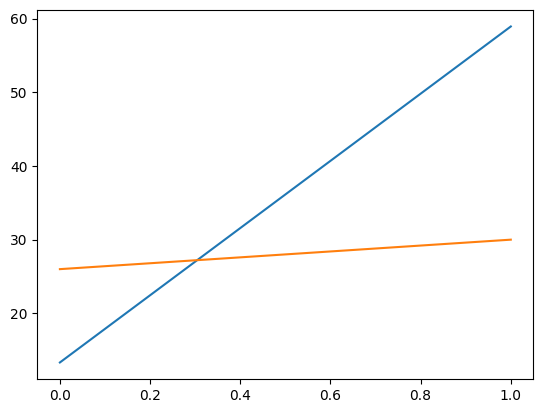

In [64]:
val = 2

x = [i for i in range(val)]

# plt.figure(figsize=(10,6))
plt.plot(x, -buy_pred[:val], label='pred')
plt.plot(x, buy_test[:val], label='pred')
# plt.legend()
plt.show()
# buy_pred